22 dec 2024

In [ ]:
import tensorflow as tf
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# vector
vector = tf.constant([10,10])
print(vector)
print(vector.ndim)

tf.Tensor([10 10], shape=(2,), dtype=int32)
1


In [ ]:
# matrix
matrix = tf.constant([[10,7],[7,10]])
print(matrix)
print(matrix.ndim)

tf.Tensor(
[[10  7]
 [ 7 10]], shape=(2, 2), dtype=int32)
2


In [ ]:
# tensor
tensor = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])
print(tensor)
print(tensor.ndim)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]], shape=(3, 2, 3), dtype=int32)
3


### tensor operation: Broadcasting

In [ ]:
# element wise addition with broadcasting
tensor_a = tf.constant([[10,7],[3,4]])
tensor + 10
tensor_b = tf.constant([10,20])
#expanded vector tensor_b to 2X2 to have an additional row of 10 and 20
tensor_a + tensor_b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 27],
       [13, 24]], dtype=int32)>

In [ ]:
import numpy as np
# variable
x = tf.Variable(2.0) # removed extraneous positional argument

with tf.GradientTape() as tape:
    y = x**2

dy_dx = tape.gradient(y,x)
print(dy_dx.numpy())

4.0


### Activation function

In [ ]:
import tensorflow as tf
import keras
x = tf.constant([-1.0,0.0,1.00])

# activation functions
sigmoid = tf.keras.activations.sigmoid(x)
tanh = tf.keras.activations.tanh(x)
relu = tf.keras.activations.relu(x)

print("sigmoid:",sigmoid.numpy())
print("tanh:",tanh.numpy())
print("relu:",relu.numpy())

sigmoid: [0.26894143 0.5        0.7310586 ]
tanh: [-0.7615942  0.         0.7615942]
relu: [0. 0. 1.]


###Loss Function

In [ ]:

#MSE
import tensorflow as tf
#MSE
y_true = tf.constant([1.0,2.0,3.0])
y_pred = tf.constant([1.2,1.8,2.5])
# Initialize the MeanSquaredError class and then call it like a function
mse_fn = tf.keras.losses.MeanSquaredError()
mse = mse_fn(y_true,y_pred)
print("MSE:",mse.numpy())


# cross Entropy
cross_entropy = tf.keras.losses.binary_crossentropy(y_true,y_pred)
print("Cross Entropy:",cross_entropy.numpy())

MSE: 0.110000014
Cross Entropy: -15.942386


### Simple Neural Network with Gradient Descent

In [ ]:
# a simple neural network
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# generate some data
np.random.seed(0)
X=np.random.rand(100,1)
y=2*X+1+0.1*np.random.rand(100,1)

In [ ]:
X[:5]

array([[0.5488135 ],
       [0.71518937],
       [0.60276338],
       [0.54488318],
       [0.4236548 ]])

In [ ]:
y[:5]

array([[2.16540866],
       [2.45737953],
       [2.27904615],
       [2.18598522],
       [1.87218491]])

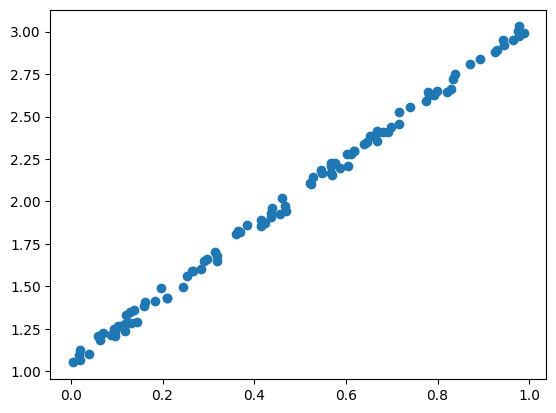

In [ ]:
# plot
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [ ]:
# build a simple model
model = Sequential([Dense(1,input_shape = (1,),activation = 'linear')])
model.compile(optimizer = 'sgd',loss = 'mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# train he model
model.fit(X,y,epochs = 100,verbose = 1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5260 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4478 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4029 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3218 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2820 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2362 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2231 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1710 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1594 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1249 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1204 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1137 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1055 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1005 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0976 
Epoch 16/100
4/4 ━━

In [ ]:
# predictions
X_new=np.array([[0.5488135 ],
       [0.71518937],
       [0.60276338],
       [0.54488318],
       [0.4236548 ]])
y_pred = model.predict(X_new)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[2.130125 ]
 [2.3758001]
 [2.2097888]
 [2.1243212]
 [1.945312 ]]


In [ ]:
y[:5]

array([[2.16540866],
       [2.45737953],
       [2.27904615],
       [2.18598522],
       [1.87218491]])